# **Image Classification Using Convolutional Neural Network (CNN)**

In [92]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np

In [93]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("train shape : ",X_train.shape)
print("test shape : ",X_test.shape)

train shape :  (50000, 32, 32, 3)
test shape :  (10000, 32, 32, 3)


In [94]:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

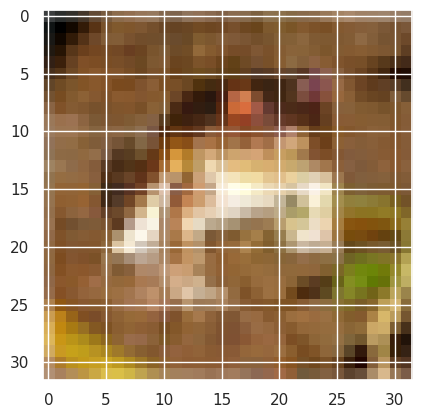

In [95]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [96]:
y_train[0]

array([6], dtype=uint8)

In [97]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [98]:
# One-hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [99]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [100]:
y_test.shape

(10000, 10)

In [101]:
num_class = y_test.shape[1] #10

### Build simple artificial neural network for image classification

In [72]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8102 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6218 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5385 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4784 - accuracy: 0.4804
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4278 - accuracy: 0.4966


## Now let's build a convolutional neural network to train our images

In [102]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [103]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [104]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_29 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_27 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 64)       

In [105]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30, batch_size=128)

Epoch 1/30
391/391 [==============================] - 14s 25ms/step - loss: 1.5781 - accuracy: 0.4342 - val_loss: 3.0512 - val_accuracy: 0.1937
Epoch 2/30
391/391 [==============================] - 9s 24ms/step - loss: 1.1321 - accuracy: 0.6013 - val_loss: 1.0599 - val_accuracy: 0.6276
Epoch 3/30
391/391 [==============================] - 9s 23ms/step - loss: 0.9267 - accuracy: 0.6767 - val_loss: 1.0638 - val_accuracy: 0.6349
Epoch 4/30
391/391 [==============================] - 9s 24ms/step - loss: 0.8113 - accuracy: 0.7172 - val_loss: 0.7482 - val_accuracy: 0.7351
Epoch 5/30
391/391 [==============================] - 9s 23ms/step - loss: 0.7411 - accuracy: 0.7425 - val_loss: 0.6941 - val_accuracy: 0.7612
Epoch 6/30
391/391 [==============================] - 9s 23ms/step - loss: 0.6850 - accuracy: 0.7647 - val_loss: 0.6946 - val_accuracy: 0.7560
Epoch 7/30
391/391 [==============================] - 9s 23ms/step - loss: 0.6318 - accuracy: 0.7837 - val_loss: 0.6854 - val_accuracy: 0.766

In [107]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

Test Accuracy: 0.8409000039100647 
Maximum Test Acuracy During Training:  0.845300018787384


In [108]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


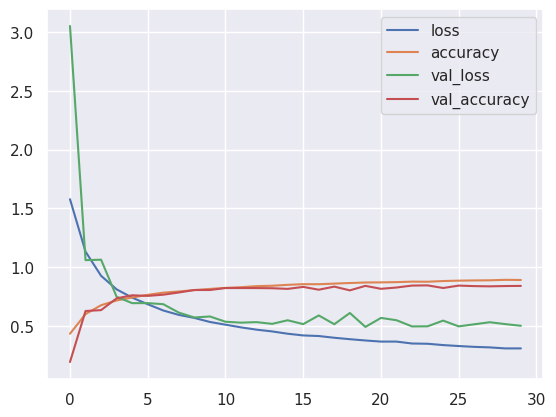

In [109]:
import pandas as pd
pd.DataFrame(history.history).plot();

In [114]:
model.save('CNN_cifar10.h5')
model_cnn = load_model('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [111]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [118]:
model_cnn.predict(X_test[0:10])[0]

1/1 [==============================] - 0s 18ms/step


array([9.8010569e-05, 2.6524238e-05, 4.9867423e-04, 9.5377463e-01,
       8.9581910e-05, 4.1565798e-02, 3.8352730e-03, 9.8126351e-05,
       8.3515324e-06, 5.0373128e-06], dtype=float32)

In [119]:
np.argmax(model_cnn.predict(X_test[0:10])[0])

1/1 [==============================] - 0s 30ms/step


3

In [121]:
labels[np.argmax(model_cnn.predict(X_test[0:10])[0])]

1/1 [==============================] - 0s 19ms/step


'cat'

In [122]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [123]:
labels[np.argmax(y_test[0])]

'cat'

In [124]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


313/313 [==============================] - 1s 3ms/step


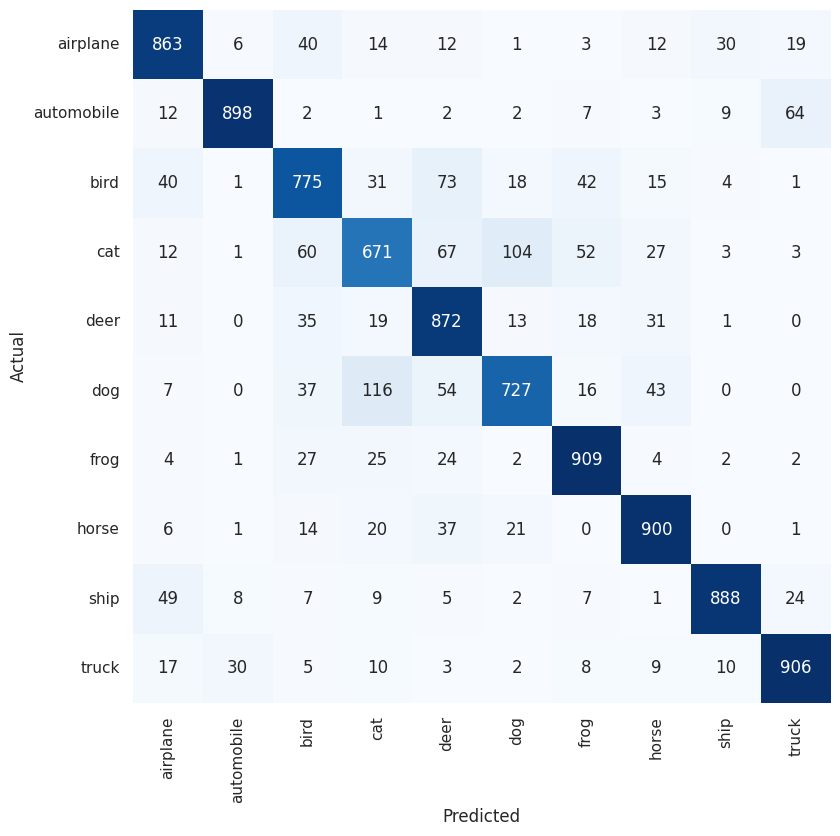

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import seaborn as sns; sns.set()

# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

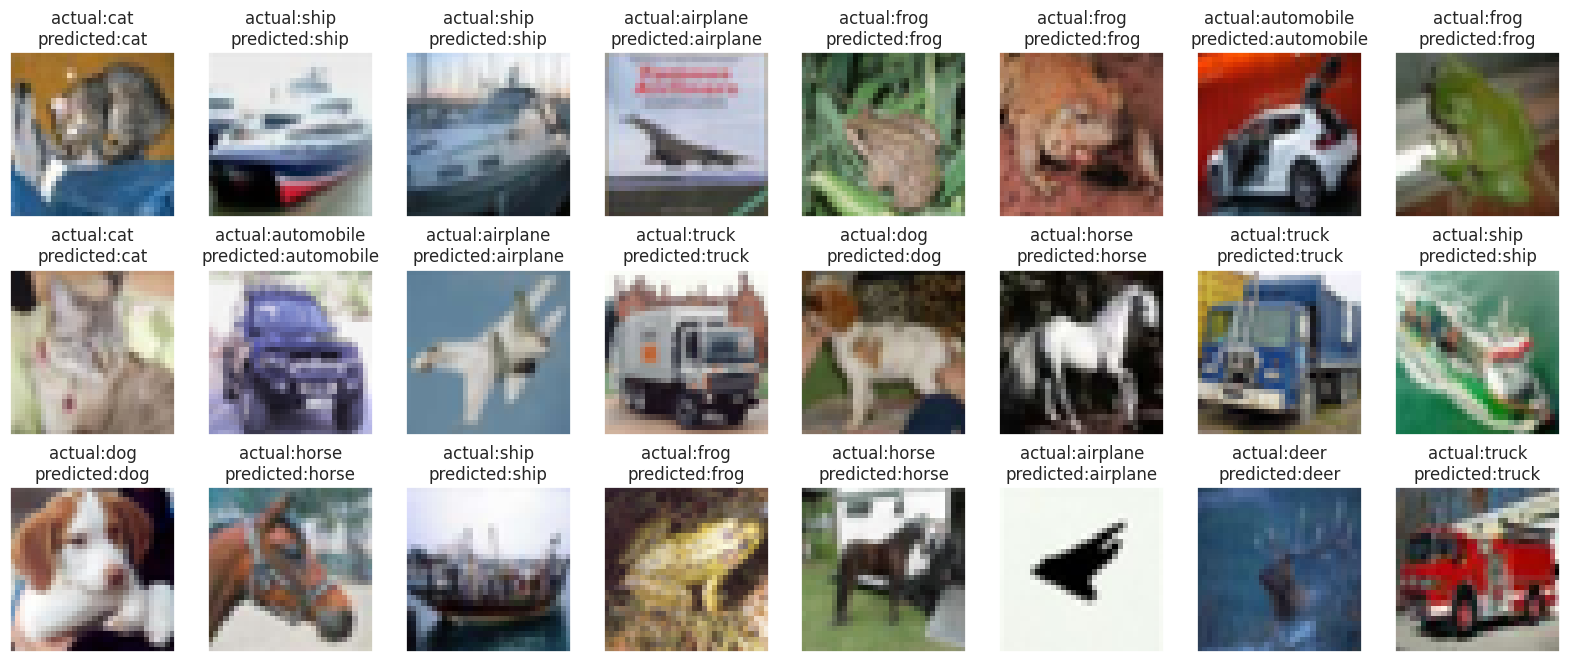

In [128]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=8, nrows=3, sharex=False,
    sharey=True, figsize=(20, 8))
index = 0
for i in range(3):
    for j in range(8):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()
